In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from statsmodels.formula.api import ols

In [2]:
swedish_motor_insurance = pd.read_csv('swedish_motor_insurance.csv')
swedish_motor_insurance.head()

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


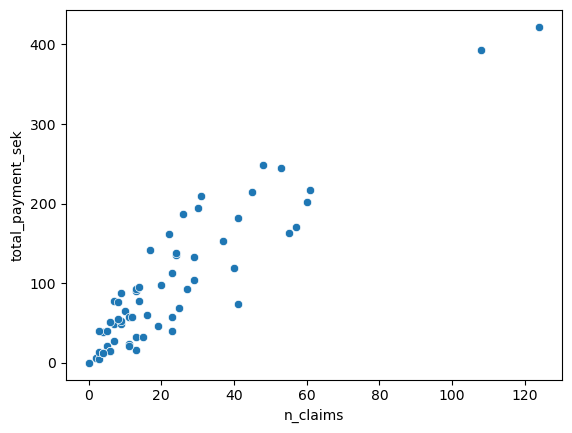

In [3]:
sns.scatterplot(x = 'n_claims', y = 'total_payment_sek', data = swedish_motor_insurance)
plt.show()

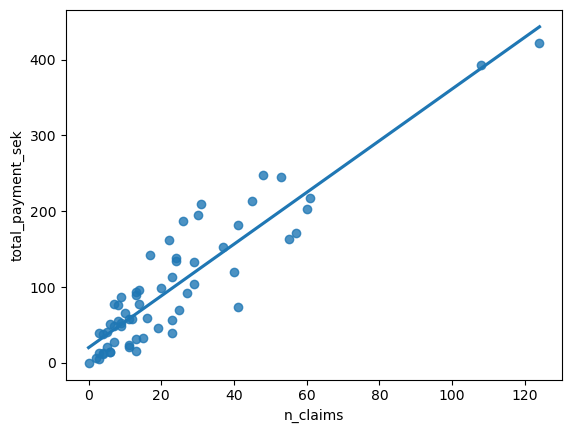

In [4]:
sns.regplot(x = 'n_claims', y = 'total_payment_sek', data = swedish_motor_insurance, ci = None)
plt.show()

In [5]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


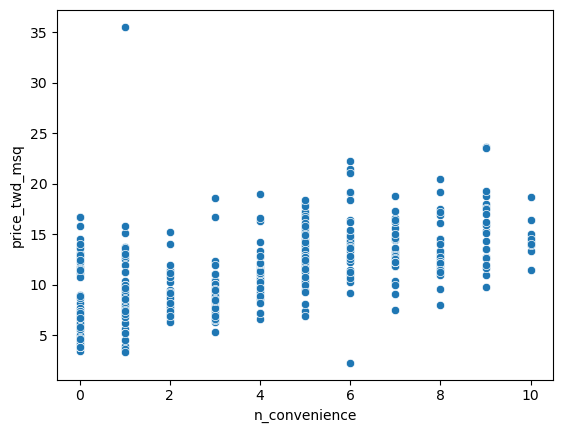

In [6]:
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate)
plt.show()

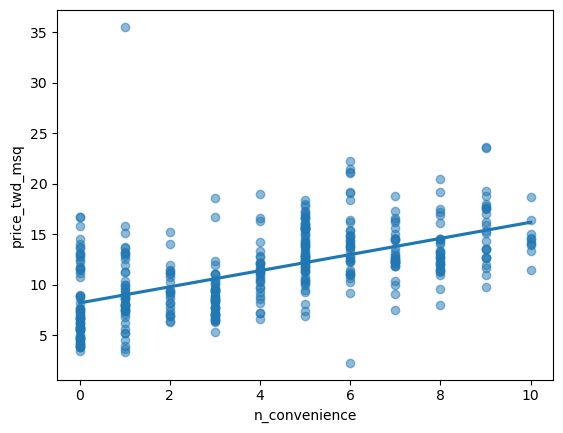

In [7]:
sns.regplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci= None, scatter_kws = {'alpha':0.5})
plt.show()

In [8]:
mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims', data = swedish_motor_insurance)
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
print(mdl_payment_vs_claims.params)


Intercept    19.994486
n_claims      3.413824
dtype: float64


In [9]:
# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)


Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [10]:
fish = pd.read_csv('fish.csv')
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


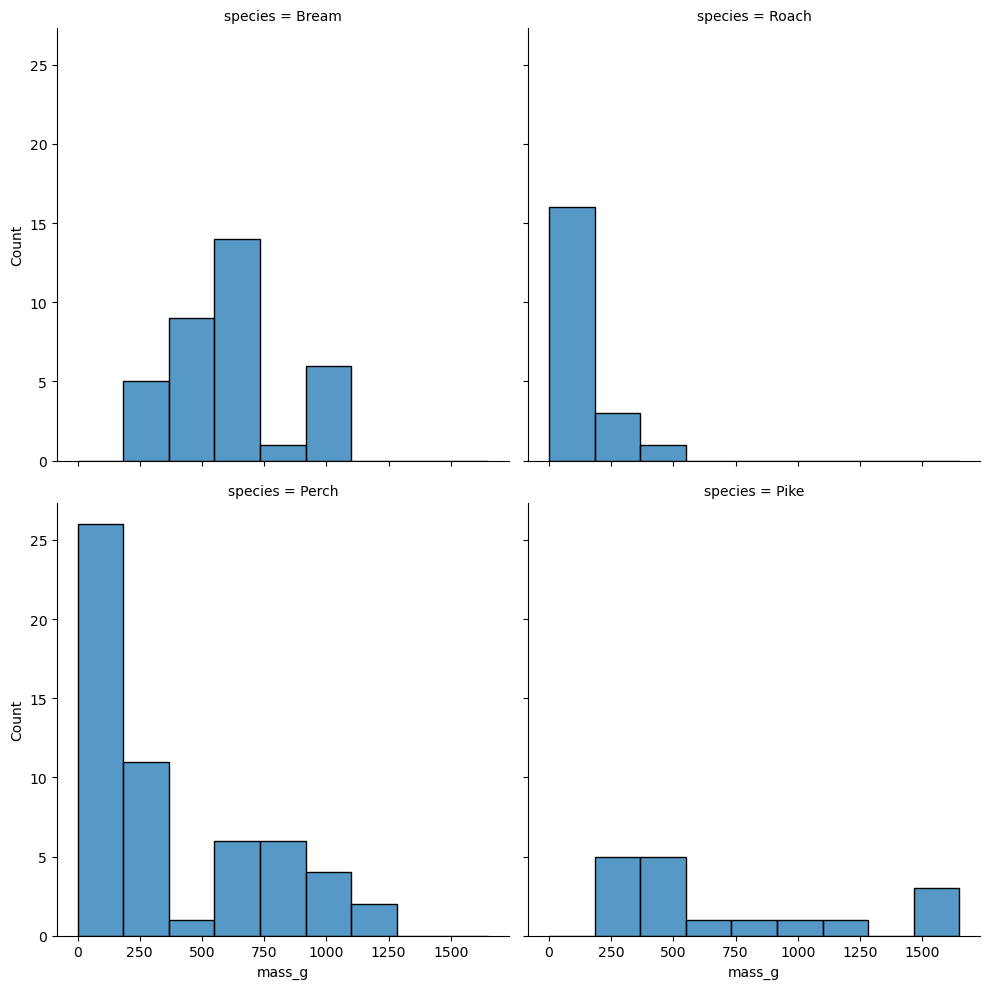

In [11]:
sns.displot(data = fish, x = 'mass_g', col = 'species', col_wrap = 2, bins = 9)
plt.show()

In [12]:
summary_stats = fish.groupby('species')['mass_g'].mean()
print(summary_stats)


species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [13]:
mdl_mass_vs_species = ols('mass_g ~ species', data = fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [14]:
mdl_mass_vs_species = ols('mass_g ~ species', data = fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [15]:
mdl_mass_vs_species = ols('mass_g ~ species + 0', data = fish).fit()
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


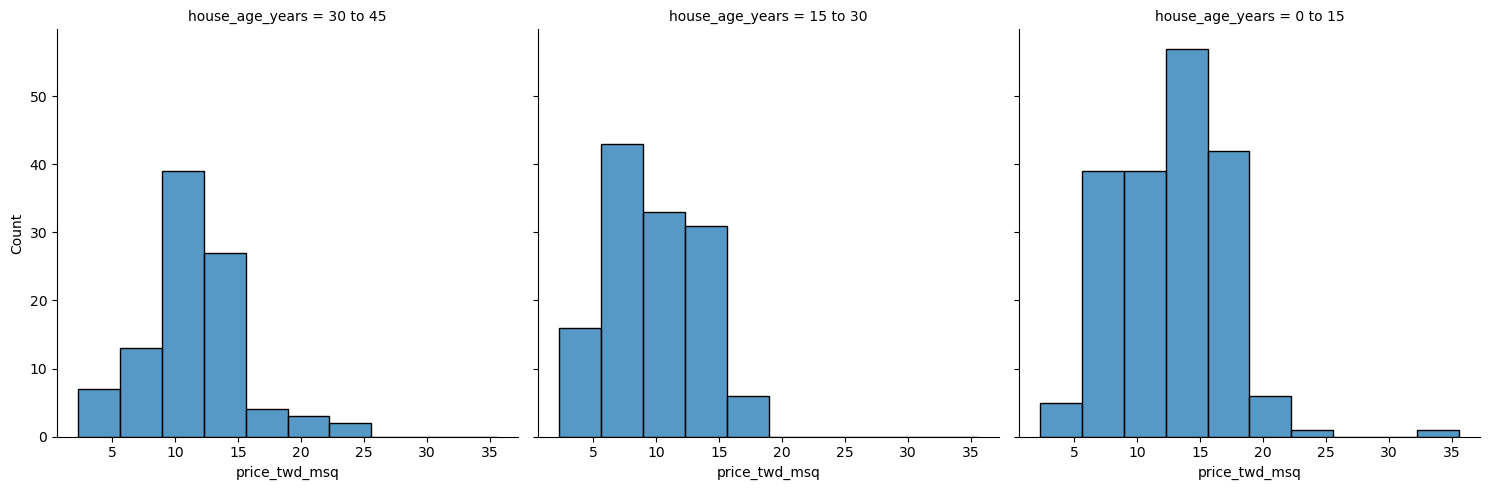

In [16]:
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()


In [17]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)


Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [18]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)


house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [19]:
bream = fish[fish['species'] == 'Bream']
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


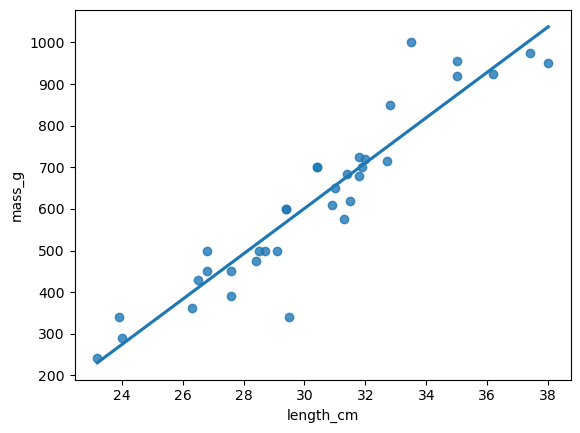

In [20]:
sns.regplot(x = 'length_cm', y = 'mass_g', data = bream, ci = None)
plt.show()

In [21]:
mdl_mass_vs_length = ols('mass_g ~ length_cm', data = bream).fit()
print(mdl_mass_vs_length.params)


Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [22]:
explanatory_data = pd.DataFrame({'length_cm' : np.arange(20,41)})
explanatory_data.head()

,length_cm
0,20
1,21
2,22
3,23
4,24


In [23]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [24]:
explanatory_data = pd.DataFrame(
    {'length_cm' : np.arange(20,41)}
)

prediction_data = explanatory_data.assign(
    mass_g = mdl_mass_vs_length.predict(explanatory_data)
)

print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


In [25]:
fig = plt.figure()

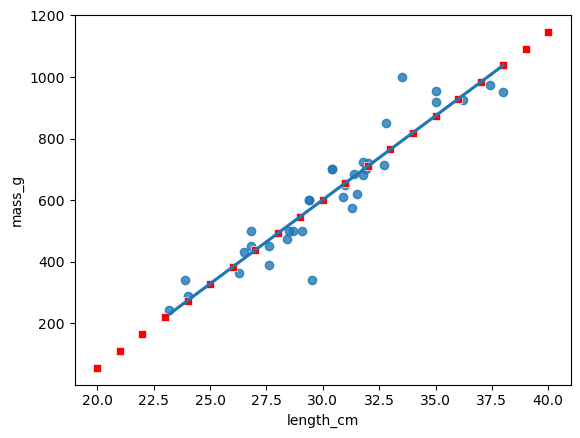

In [26]:
sns.regplot( x = 'length_cm',
           y = 'mass_g',
           ci = None,
           data = bream)
sns.scatterplot(x = 'length_cm',
                y = 'mass_g',
                data = prediction_data,
                color = 'red',
                marker = 's')
plt.show()

In [27]:
little_bream = pd.DataFrame({"length_cm" : [10]})

pred_little_bream = little_bream.assign(mass_g = mdl_mass_vs_length.predict(little_bream))

print(pred_little_bream)

   length_cm      mass_g
0         10 -489.847756


In [28]:
# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

#print(explanatory_data)

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

#print(price_twd_msq)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)


    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [29]:
print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [30]:
explanatory_data = bream['length_cm']

print(mdl_mass_vs_length.predict(explanatory_data))

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [31]:
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [32]:
print(bream['mass_g'] - mdl_mass_vs_length.fittedvalues)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [33]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0]   # intercept = coeffs.iloc[0]
slope = coeffs[1] # slope = coeffs.iloc[1] 

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)


0     26.739687
1     27.378151
2     27.298343
3     29.213734
4     29.373350
5     29.612774
6     29.612774
7     30.251238
8     30.251238
9     30.969509
10    30.889701
11    31.129125
12    31.448357
13    31.767589
14    31.687781
15    31.687781
16    32.485861
17    32.485861
18    32.884901
19    32.964709
20    33.204133
21    33.283941
22    33.363749
23    33.603172
24    33.682980
25    33.603172
26    33.762788
27    34.321444
28    34.401252
29    34.959908
30    36.157028
31    36.157028
32    37.114723
33    38.072419
34    38.551267
Name: length_cm, dtype: float64


/var/folders/0k/sxpkc5jn6336yf8n1_lhlwv00000gn/T/ipykernel_44684/1141123679.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]   # intercept = coeffs.iloc[0]
/var/folders/0k/sxpkc5jn6336yf8n1_lhlwv00000gn/T/ipykernel_44684/1141123679.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1] # slope = coeffs.iloc[1]


In [34]:
# # Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
# price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# # Create prediction_data
# prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)

# # Print the result
# print(prediction_data)


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'n_convenience' is not defined
    price_twd_msq ~ n_convenience
                    ^^^^^^^^^^^^^

In [164]:
perch = fish[fish['species']=='Perch']

perch.head()


,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7


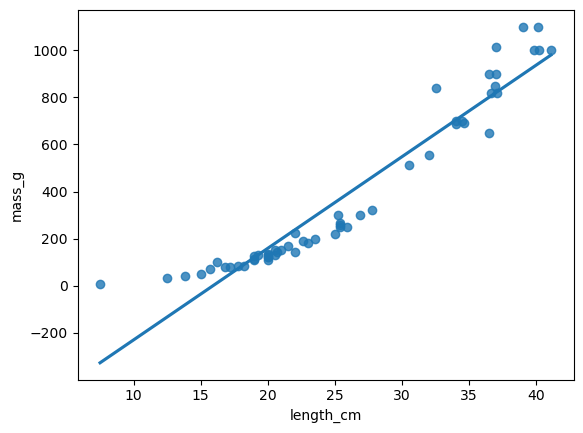

In [165]:
sns.regplot(x='length_cm', y='mass_g', data=perch,ci=None)
plt.show()

/var/folders/0k/sxpkc5jn6336yf8n1_lhlwv00000gn/T/ipykernel_48717/1184029448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm'] ** 3


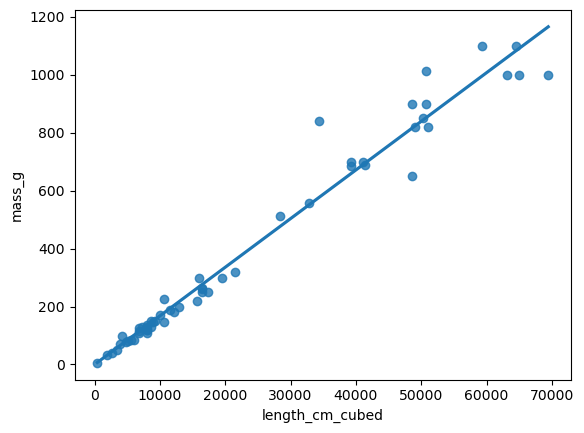

In [180]:
perch['length_cm_cubed'] = perch['length_cm'] ** 3
sns.regplot(x='length_cm_cubed',
            y='mass_g',
            data=perch,
            ci=None)
plt.show()

In [166]:
perch['length_cm_cubed'] = perch['length_cm'] ** 3
mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
mdl_perch.params


/var/folders/0k/sxpkc5jn6336yf8n1_lhlwv00000gn/T/ipykernel_48717/1637856579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm'] ** 3


Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

In [167]:
explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10,41,5) ** 3, 
                                 'length_cm': np.arange(10,41,5)})

prediction_data = explanatory_data.assign(
    mass_g = mdl_perch.predict(explanatory_data)
)

print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


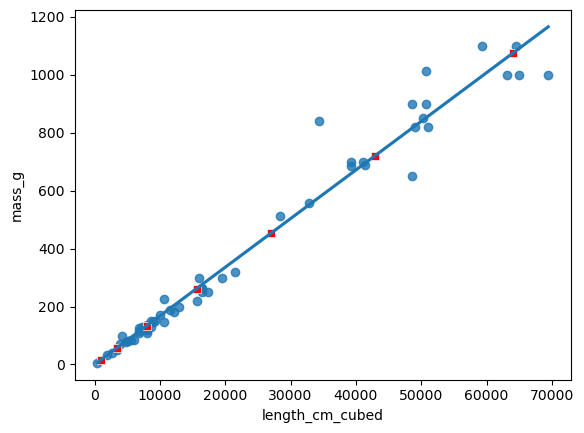

In [168]:
fig = plt.figure()
sns.regplot(x='length_cm_cubed', y='mass_g',data=perch,ci=None)
sns.scatterplot(data=prediction_data, x='length_cm_cubed', y='mass_g', color='red', marker='s')
plt.show()


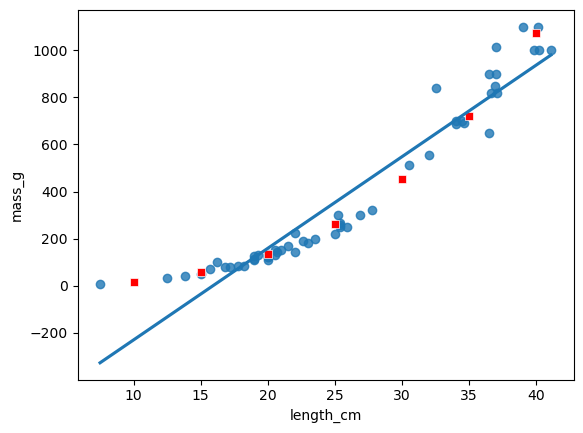

In [169]:
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g',data=perch,ci=None)
sns.scatterplot(data=prediction_data, x='length_cm', y='mass_g', color='red', marker='s')
plt.show()


   species  mass_g  length_cm
55   Perch     5.9        7.5
56   Perch    32.0       12.5
57   Perch    40.0       13.8
58   Perch    51.5       15.0
59   Perch    70.0       15.7


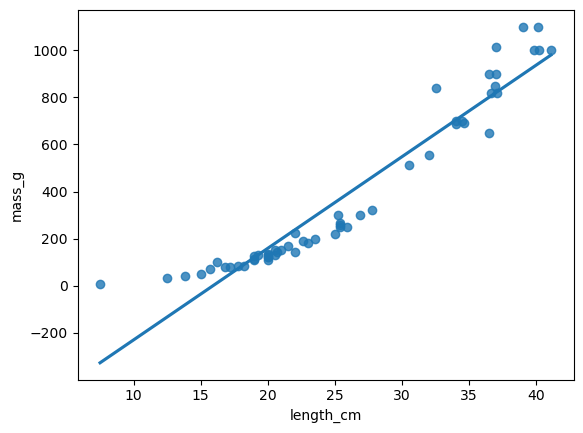

/var/folders/0k/sxpkc5jn6336yf8n1_lhlwv00000gn/T/ipykernel_48717/1460928559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubed'] = perch['length_cm']**3


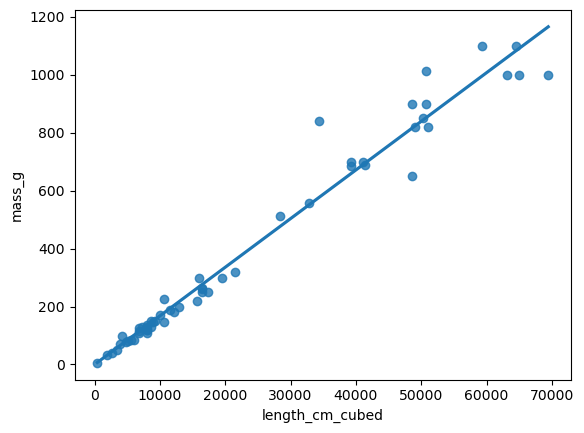

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64
   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


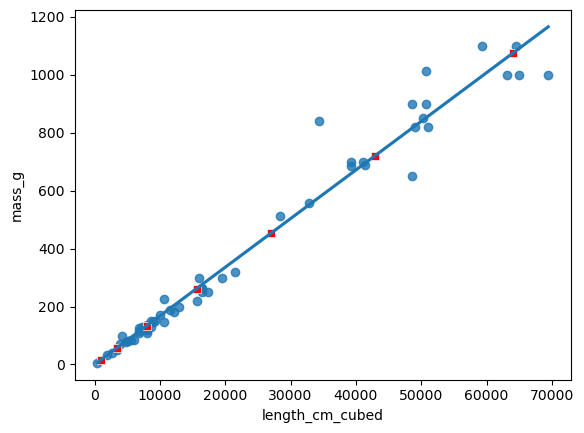

In [170]:
perch = fish[fish['species'] == 'Perch']
print(perch.head())

sns.regplot(x='length_cm', y = 'mass_g', data = perch, ci=None)
plt.show()

perch['length_cm_cubed'] = perch['length_cm']**3
sns.regplot(x='length_cm_cubed', y = 'mass_g', data = perch, ci=None)
plt.show()

mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
print(mdl_perch.params)

explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10,41,5)**3,
                               'length_cm': np.arange(10,41,5)})
prediction_data = explanatory_data.assign(mass_g=mdl_perch.predict(explanatory_data))
print(prediction_data)

fig = plt.figure()
sns.regplot(x='length_cm_cubed', y = 'mass_g', data = perch, ci=None)
sns.scatterplot(data=prediction_data, x = 'length_cm_cubed', y = 'mass_g', color='red', marker='s')
plt.show()


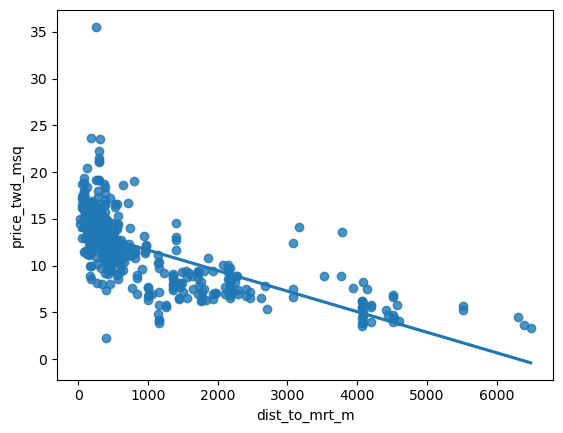

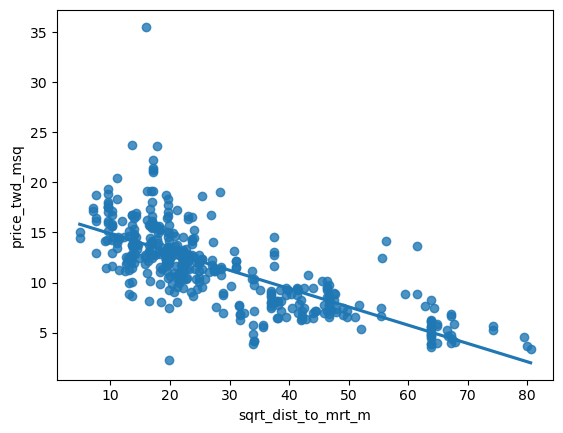

In [171]:
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()


In [172]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)


Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [173]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)


   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


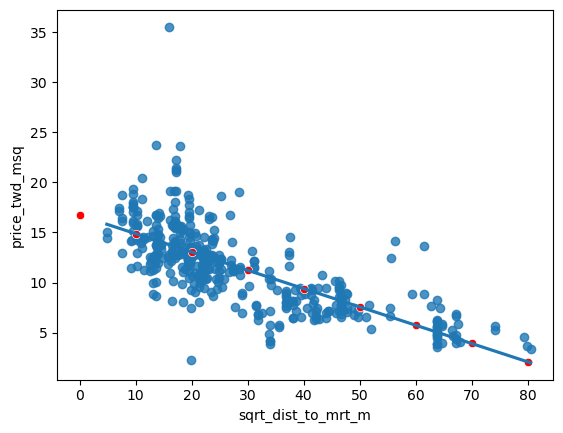

In [174]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()


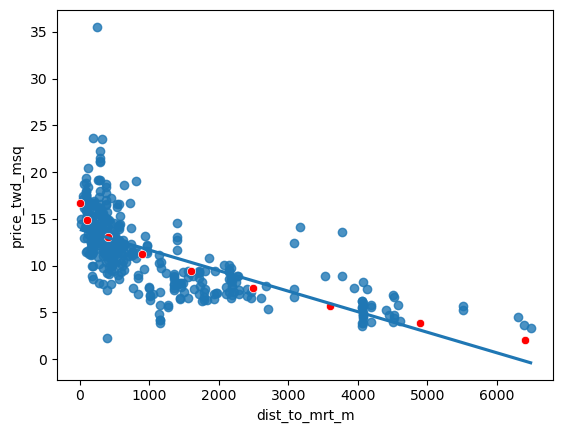

In [175]:
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()


In [176]:
mdl_bream = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.22e-16
Time:                        15:48:57   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [177]:
print(mdl_bream.rsquared)

0.8780627095147174


In [178]:
mse = mdl_bream.mse_resid
print('mse: ',mse)

mse:  5498.555084973522


In [179]:
rse = np.sqrt(mse)
print('rse: ',rse)

rse:  74.15224261594199
